# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


In [24]:
sorted_cities=sorted(cities)
print(sorted_cities)

['aasiaat', 'abomsa', 'acapulco', 'adrar', 'aflu', 'aginskoye', 'agua dulce', 'ahipara', 'airai', 'ajdabiya', 'aklavik', 'aktau', 'akyab', 'albany', 'alcala de henares', 'alibag', 'allende', 'alta floresta', 'amahai', 'ambilobe', 'amderma', 'ancud', 'andenes', 'anito', 'anloga', 'anqing', 'antofagasta', 'aranda de duero', 'ardesen', 'arlit', 'arraial do cabo', 'aswan', 'at-bashi', 'atambua', 'atar', 'atbasar', 'atka', 'attawapiskat', 'atuona', 'auki', 'aurora', 'avarua', 'avera', 'awbari', 'ayagoz', 'aybak', 'bacuit', 'balkhash', 'bambanglipuro', 'bambous virieux', 'banda aceh', 'barberton', 'barcelona', 'barentsburg', 'barinas', 'barra', 'barra patuca', 'barrow', 'batagay-alyta', 'batemans bay', 'bayir', 'beaverlodge', 'beidao', 'belaya gora', 'belmonte', 'beloha', 'belushya guba', 'belyy yar', 'bengkulu', 'berdigestyakh', 'bereda', 'bereznik', 'beringovskiy', 'berlevag', 'bethel', 'betsiamites', 'beverley', 'beyla', 'biak', 'birobidzhan', 'bissau', 'blonduos', 'bluff', 'boa vista', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sassandra
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | kulhudhuffushi
Processing Record 5 of Set 1 | galle
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | doctor arroyo
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | paamiut
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | yuzhno-kurilsk
Processing Record 22 of Set 1 | dzhusaly

Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | novobirilyussy
Processing Record 41 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | georgiyevka
Processing Record 44 of Set 4 | abnub
Processing Record 45 of Set 4 | stornoway
Processing Record 46 of Set 4 | malanje
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 0 of Set 5 | leh
Processing Record 1 of Set 5 | zhob
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | quelimane
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | riyadh
Processing Record 9 of Set 5 | katha
City not fou

Processing Record 26 of Set 8 | plettenberg bay
Processing Record 27 of Set 8 | arua
Processing Record 28 of Set 8 | puerto del rosario
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | nsanje
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 33 of Set 8 | haibowan
City not found. Skipping...
Processing Record 34 of Set 8 | gizo
Processing Record 35 of Set 8 | melfort
Processing Record 36 of Set 8 | birao
Processing Record 37 of Set 8 | visnes
Processing Record 38 of Set 8 | ardistan
City not found. Skipping...
Processing Record 39 of Set 8 | otavi
Processing Record 40 of Set 8 | colares
Processing Record 41 of Set 8 | ucluelet
Processing Record 42 of Set 8 | maues
Processing Record 43 of Set 8 | chatra
Processing Record 44 of Set 8 | san jose
Processing Record 45 of Set 8 | ati
Processing Record 46 of Set 8 | tuatapere
Processing Record 47 of Set 8 | 

Processing Record 14 of Set 12 | bandarbeyla
Processing Record 15 of Set 12 | brae
Processing Record 16 of Set 12 | deloraine
Processing Record 17 of Set 12 | yaan
Processing Record 18 of Set 12 | saint-georges
Processing Record 19 of Set 12 | beira
Processing Record 20 of Set 12 | tomatlan
Processing Record 21 of Set 12 | along
Processing Record 22 of Set 12 | awjilah
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | vila
Processing Record 25 of Set 12 | shingu
Processing Record 26 of Set 12 | castleisland
Processing Record 27 of Set 12 | papar
Processing Record 28 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 12 | harlingen
Processing Record 30 of Set 12 | road town
Processing Record 31 of Set 12 | mocambique
City not found. Skipping...
Processing Record 32 of Set 12 | andenes
Processing Record 33 of Set 12 | antalaha
Processing Record 34 of Set 12 | itoman
Processing Record 35 of Set 12 | puerto carreno
Processing Record 36 of Set

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
#print(city_data)

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sassandra,4.9500,-6.0833,26.60,85,100,1.87,CI,1681088993
1,kruisfontein,-34.0033,24.7314,10.49,82,0,3.66,ZA,1681088993
2,kodiak,57.7900,-152.4072,-3.27,39,0,12.35,US,1681088993
3,kulhudhuffushi,6.6221,73.0700,28.63,71,18,4.15,MV,1681088994
4,galle,6.0367,80.2170,24.68,82,0,2.74,LK,1681088826


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sassandra,4.9500,-6.0833,26.60,85,100,1.87,CI,1681088993
1,kruisfontein,-34.0033,24.7314,10.49,82,0,3.66,ZA,1681088993
2,kodiak,57.7900,-152.4072,-3.27,39,0,12.35,US,1681088993
3,kulhudhuffushi,6.6221,73.0700,28.63,71,18,4.15,MV,1681088994
4,galle,6.0367,80.2170,24.68,82,0,2.74,LK,1681088826


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

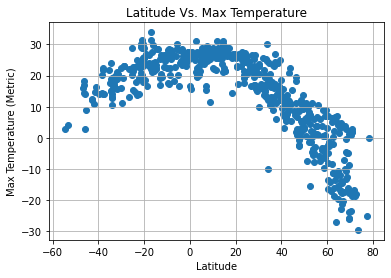

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Metric)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

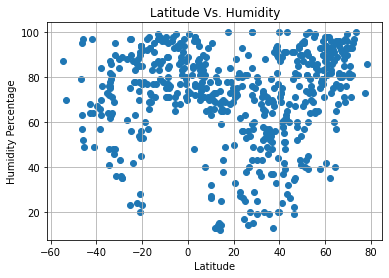

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

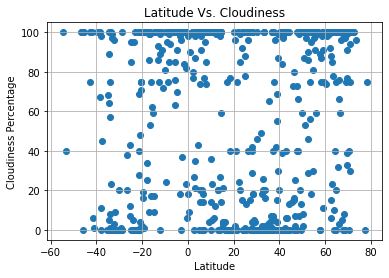

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

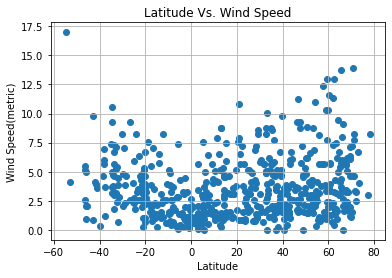

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(metric)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.47
The r-value is: 0.00
The r-value is: 0.00
The r-value is: 0.01


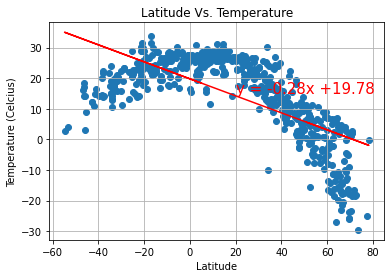

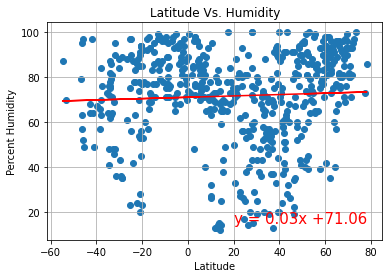

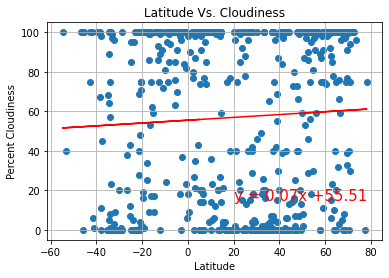

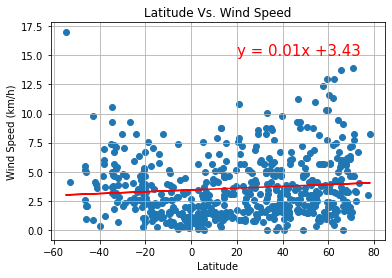

In [53]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
        
        print(f"The r-value is: {rvalue**2:.2f}")
        
    line_regress(x_values, y_values)

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sassandra,4.9500,-6.0833,26.60,85,100,1.87,CI,1681088993
2,kodiak,57.7900,-152.4072,-3.27,39,0,12.35,US,1681088993
3,kulhudhuffushi,6.6221,73.0700,28.63,71,18,4.15,MV,1681088994
4,galle,6.0367,80.2170,24.68,82,0,2.74,LK,1681088826
7,chokurdakh,70.6333,147.9167,-18.62,85,30,4.59,RU,1681088995


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kruisfontein,-34.0033,24.7314,10.49,82,0,3.66,ZA,1681088993
5,mar del plata,-38.0023,-57.5575,21.72,63,0,5.66,AR,1681088865
6,bluff,-46.6000,168.3333,16.02,79,100,5.15,NZ,1681088962
8,yulara,-25.2406,130.9889,28.95,23,43,4.02,AU,1681088995
9,rikitea,-23.1203,-134.9692,25.01,63,0,3.37,PF,1681088957


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7620223391338617


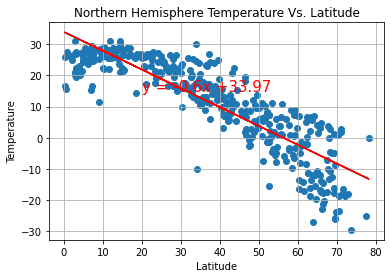

In [61]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.49430396002860666


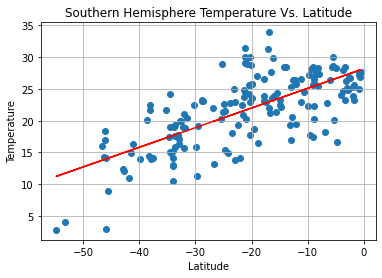

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cities nearer the equator will have higher temperatures and you can see temperature has an opposite reactions to distancing the equator in the northern and southern hemispheres. The r values in each scenario indicates strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.058490308621922484


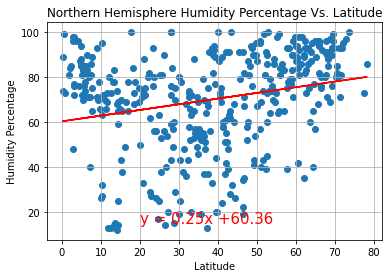

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.10515740569295083


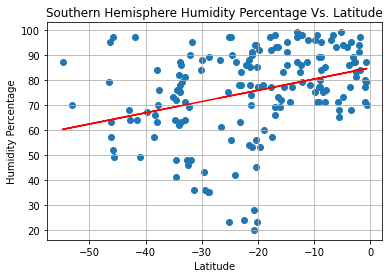

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Humidity Percentage Vs. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Neither hemisphere have a strong correlation as seen on the graph and further proved by the r value and linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02885484203753421


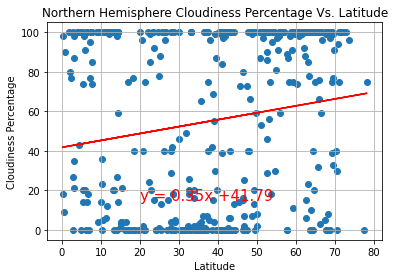

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.07537524034241436


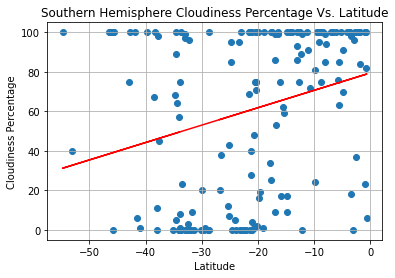

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Cloudiness Percentage Vs. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Similarly with humidity, it can clearly be seen that cloudiness and latitude do not have a strong correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05125346254210108


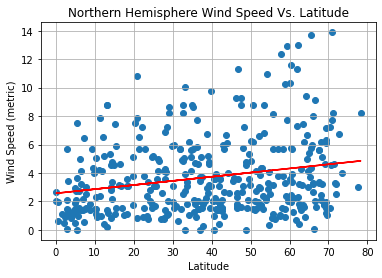

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.20218402367868313


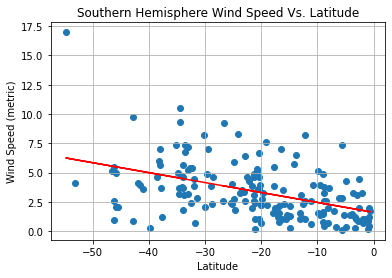

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed (metric)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** It can be argued that there is yet again, not a ctrong correlation between wind speed and latitude of a certain city.